# **Parte 1: Compresión de imágenes con Kmeans**


## **Leer la imagen**

Imagen Original


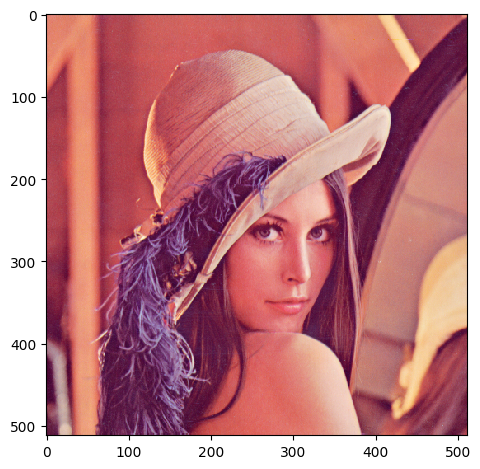

In [1]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np

#Lee la imagen
image = io.imread('lena.png') #recuerda cargar la imagen a su notebook en google colab.
print('Imagen Original')
io.imshow(image)
io.show()

#Dimensiones de la imagen original
rows = image.shape[0]
cols = image.shape[1]

#Transforma en matriz de Nx3 (N pixeles, 3 características R, G, B)
image = image.reshape(rows*cols, 3)

#Matriz Nx3
#pixel 1: R, G, B
#pixel 2: R, G, B
#...
#pixen N: R, G, B

## **Implementar k-means**

In [2]:
#Implementa k-means clustering para k clusters
print('Calculando k-means')
k = 2 # número de colores
kmeans = KMeans(n_clusters=k) #con n_clusters = 128 puede demorar unos 5 minutos en ejecutar., n_clusters es el num. de colores.
kmeans.fit(image)

Calculando k-means


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

## **Comprimir imagen**

In [3]:
#Compresión: Reemplaza cada pixel  con su centroide más cercano
print('Comprimiendo la imagen')
compressed_image = kmeans.cluster_centers_[kmeans.labels_] #cluster_centers_ son las coord. de los centroides
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

#Regresamos a la dimensión original filasxcolumnas*3
compressed_image = compressed_image.reshape(rows, cols, 3)



Comprimiendo la imagen


## **Mostrar Imagen comprimida**

Imagen comprimida


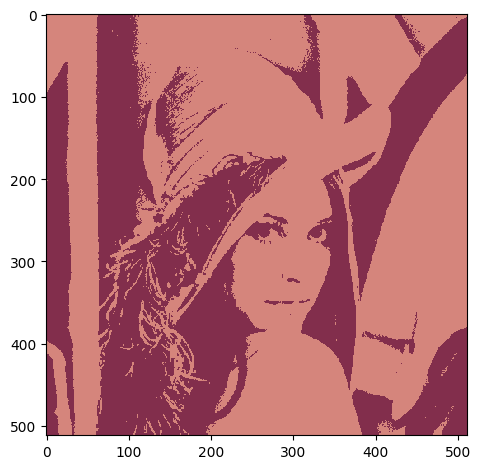

In [4]:
#Guardamos y mostramos la imagen comprimida
print('Imagen comprimida')
io.imsave('compressed_image_8.png', compressed_image)
io.imshow(compressed_image)
io.show()

## Actividad

Grafique la distorsión (heterogeneidad) en función del número de clusters k. Utilice los siguientes valores para k: 1, 2, 4, 8, 16, 32, 64, 128. Comente sus resultados. A partir de qué valor de k para usted es imperceptible la diferencia entre la imagen original y la comprimida?

Tip: Consulte la ayuda de kmeans para entender donde almacena la distorsión el objeto kmeans https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html . Recuerde que la distorsión no es nada más que la suma de las distancias al cuadrado entre las muestras y su cluster más cercano. 


Calculando k-means para k =   1


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Comprimiendo la imagen para k =  1
Imagen comprimida para k =  1


<ipython-input-12-dd361d070ce0>:20: UserWarning: compressed_image_8.png is a low contrast image
  io.imsave('compressed_image_8.png', compressed_image)
/usr/local/lib/python3.9/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


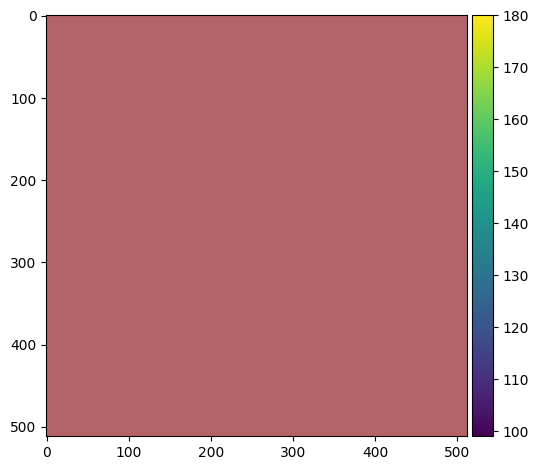

Calculando k-means para k =   2


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Comprimiendo la imagen para k =  2
Imagen comprimida para k =  2


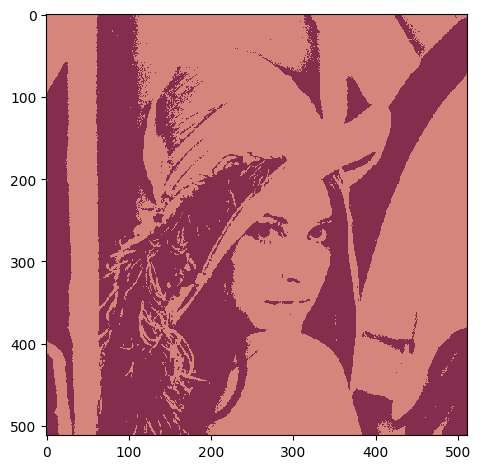

Calculando k-means para k =   4


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Comprimiendo la imagen para k =  4
Imagen comprimida para k =  4


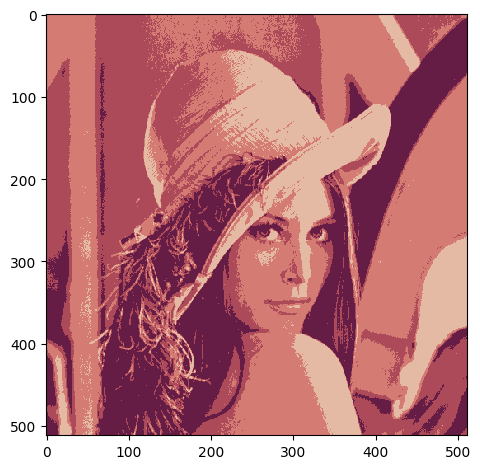

Calculando k-means para k =   8


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Comprimiendo la imagen para k =  8
Imagen comprimida para k =  8


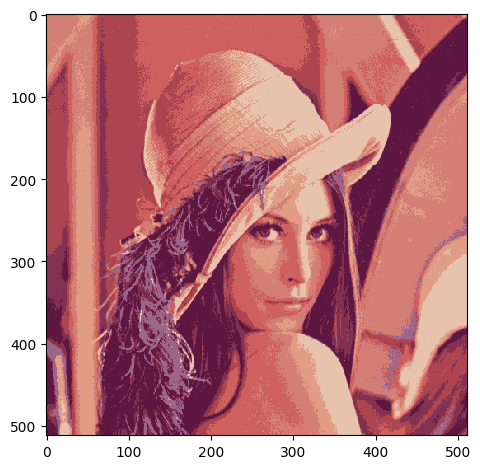

Calculando k-means para k =   16


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Comprimiendo la imagen para k =  16
Imagen comprimida para k =  16


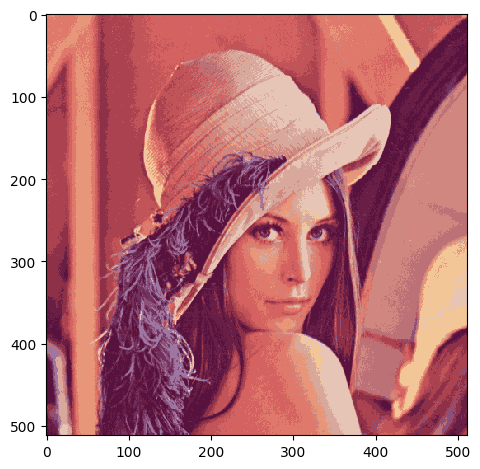

Calculando k-means para k =   32


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Comprimiendo la imagen para k =  32
Imagen comprimida para k =  32


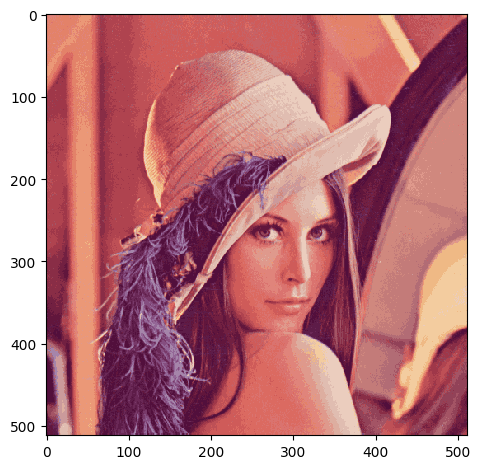

Calculando k-means para k =   64


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Comprimiendo la imagen para k =  64
Imagen comprimida para k =  64


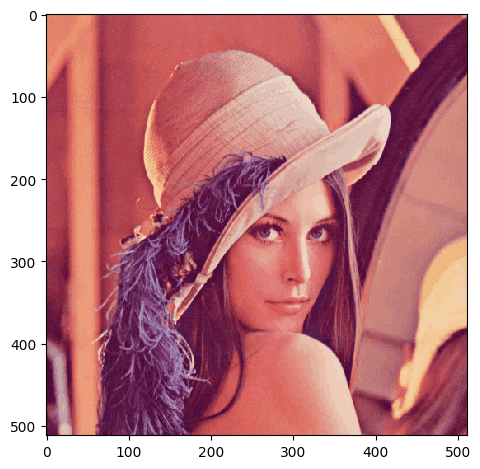

Calculando k-means para k =   128


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Comprimiendo la imagen para k =  128
Imagen comprimida para k =  128


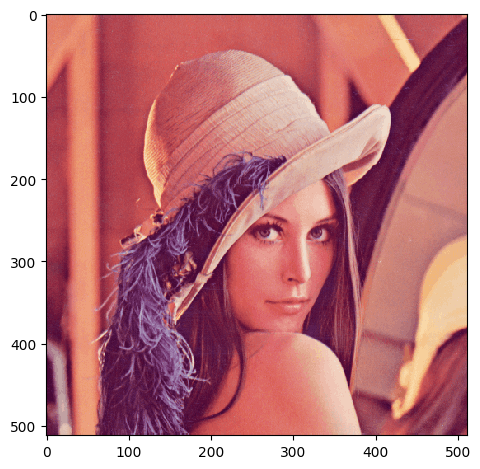

In [12]:
#Implementa k-means clustering para k clusters
k = [1,2,4,8,16,32,64,128] # número de colores
distorsion = []
for i in k: 
  print('Calculando k-means para k =  ', i)
  kmeans = KMeans(n_clusters=i) #con n_clusters = 128 puede demorar unos 5 minutos en ejecutar., n_clusters es el num. de colores.
  kmeans.fit(image)
  distorsion.append(kmeans.inertia_) #cluster_centers_ son las coord. de los centroides

  #Compresión: Reemplaza cada pixel  con su centroide más cercano
  print('Comprimiendo la imagen para k = ', i)
  compressed_image = kmeans.cluster_centers_[kmeans.labels_] #cluster_centers_ son las coord. de los centroides
  compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

  #Regresamos a la dimensión original filasxcolumnas*3
  compressed_image = compressed_image.reshape(rows, cols, 3)

  #Guardamos y mostramos la imagen comprimida
  print('Imagen comprimida para k = ', i)
  io.imsave('compressed_image_8.png', compressed_image)
  io.imshow(compressed_image)
  io.show()

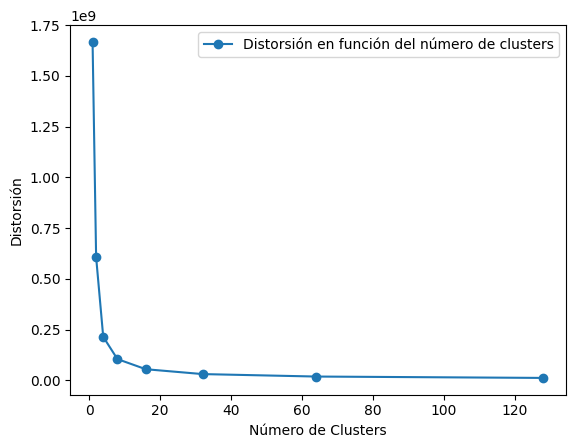

[1667696252.483666,
 607088451.4581901,
 214402412.80558157,
 104698631.19235456,
 54736935.31049685,
 30775993.912985384,
 18667160.414809674,
 11884878.942435645]

In [16]:
import matplotlib.pyplot as plt

# Plot the two arrays
plt.plot(k, distorsion, '-o',label='Distorsión en función del número de clusters')

# Add a legend and axis labels
plt.legend()
plt.xlabel('Número de Clusters')
plt.ylabel('Distorsión')

# Show the plot
plt.show()
distorsion

**A partir de $k = 32$, a mi parecer,  es imperceptible la diferencia entre la imagen original y la comprimida.**

# **Parte 2: Clustering de vinos**

En la siguiente actividad se implementará un ejemplo de aprendizaje no supervisado utilizando k-means (Clustering).

Se tiene que agrupar vinos con caracteristicas similares para esto se debe cargar el archivo caractersiticas de vinos. La base de datos tiene 178 vinos y sus características como alcohol, alcalinidad, entre otras.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
vinos=pd.read_csv('caracteristicas_de_vinos.csv',engine='python') #cargue el archivo csv a su google colab
vinos.head()

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Se elimina la primera columna pues esta es solo un índice

In [14]:
vinos_variables=vinos.drop(['Vino'],axis=1)
# se describe su media, desviación estandar minimo máximo de cada una de las características 
vinos_variables.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


A continuación, normalizamos los datos para que sus variables tengan media cero y varianza unitaria. La función `StandardScaler` es la que nos permite realizar esta normalización

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #normalizaciòn media cero, varianza 1.
scaler.fit(vinos_variables)
vinos_norm = scaler.transform(vinos_variables)
pd.DataFrame(vinos_norm).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


## Actividad

Determine el número de clusters óptimo utilizando la técnica del codo (elbow´s method). Para esto, ejecute k-means para valores de k=1, 2, ... 11 y guarde la distorsión de cada clusterización. Grafique la distorsión en función de K y aplica el método del codo para determinar el valor óptimo de k (número de clusters).

Tip: Consulte la ayuda de kmeans para entender donde almacena la distorsión el objeto kmeans https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html . Recuerde que la distorsión no es nada más que la suma de las distancias al cuadrado entre las muestras y su cluster más cercano. 



Calculando k-means para k =   1
Calculando k-means para k =   2
Calculando k-means para k =   3
Calculando k-means para k =   4
Calculando k-means para k =   5


C:\Users\valex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\valex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\valex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\valex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Calculando k-means para k =   6
Calculando k-means para k =   7
Calculando k-means para k =   8
Calculando k-means para k =   9


C:\Users\valex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\valex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\valex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\valex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Calculando k-means para k =   10
Calculando k-means para k =   11


C:\Users\valex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\valex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


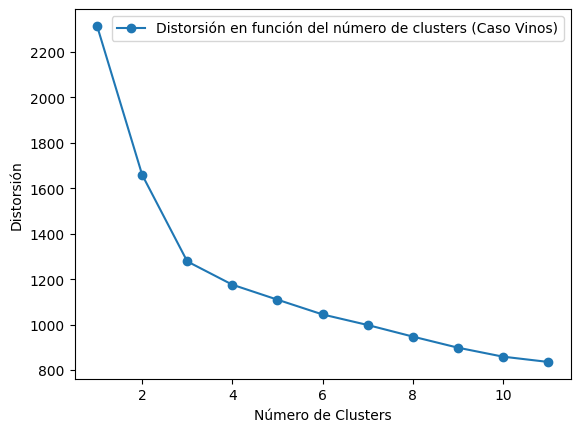

[2314.0000000000005,
 1658.7588524290954,
 1277.928488844642,
 1175.501001765632,
 1109.6012330598774,
 1044.6650567512286,
 998.2141113244717,
 947.3250902204838,
 898.5181362452325,
 858.9480635833289,
 835.7357179582076]

In [16]:
# INICIO CÓDIGO]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #normalizaciòn media cero, varianza 1.
scaler.fit(vinos_variables)
vinos_norm = scaler.transform(vinos_variables)
pd.DataFrame(vinos_norm).describe()

#Implementa k-means clustering para k clusters
k_vinos = [1,2,3,4,5,6,7,8,9,10,11] # número de colores
distorsion_vinos = []
for i in k_vinos: 
  print('Calculando k-means para k =  ', i)
  kmeans = KMeans(n_clusters=i) #con n_clusters = 128 puede demorar unos 5 minutos en ejecutar., n_clusters es el num. de colores.
  kmeans.fit(vinos_norm)
  distorsion_vinos.append(kmeans.inertia_) #cluster_centers_ son las coord. de los centroides

#INSERTE AQUÍ EL CÓDIGO SOLICITADO
import matplotlib.pyplot as plt

# Plot the two arrays
plt.plot(k_vinos, distorsion_vinos, '-o', label='Distorsión en función del número de clusters (Caso Vinos)')

# Add a legend and axis labels
plt.legend()
plt.xlabel('Número de Clusters')
plt.ylabel('Distorsión')

# Show the plot
plt.show()
distorsion_vinos
#FIN CÓDIGO

**Por la gráfica obtenida, haciendo uso del método del codo, se presume que el valor óptimo de $k$ es $3$.**

Una vez determinado el número de clusters óptimo de acuerdo al método del codo, vamos a ejecutar de nuevo kmeans con dicho valor. En este apartado, usted solo tiene que asignar el valor de k obtenido del análisis anterior a la variable `nc` del siguiente bloque:

In [17]:
nc= 3 ##### Coloque aquí el valor de k obtenido con el método del codo del apartado anterior
clustering = KMeans(n_clusters=nc, max_iter=300)
clustering.fit(vinos_norm)
vinos['KMeans_Clusters']=clustering.labels_ #creamos una columna con la etiqueta inferida zi por kmeans
vinos

C:\Users\valex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KMeans_Clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,174,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,175,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,176,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,177,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


Con el fin de graficar los cluster se utilizará el algortimo PCA para visualizar los datos a graficar 

In [18]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_vinos=pca.fit_transform(vinos_norm)
pca_vinos_df = pd.DataFrame(data=pca_vinos, columns =['Componente_1', 'Componente_2'])
pca_nombres_vinos= pd.concat([pca_vinos_df, vinos[['KMeans_Clusters']]], axis=1)
pca_nombres_vinos

,Componente_1,Componente_2,KMeans_Clusters
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1
...,...,...,...
173,-3.370524,-2.216289,2
174,-2.601956,-1.757229,2
175,-2.677839,-2.760899,2
176,-2.387017,-2.297347,2


Una vez realizado PCA se realizará la gráfica de los cluster


<function matplotlib.pyplot.show(close=None, block=None)>

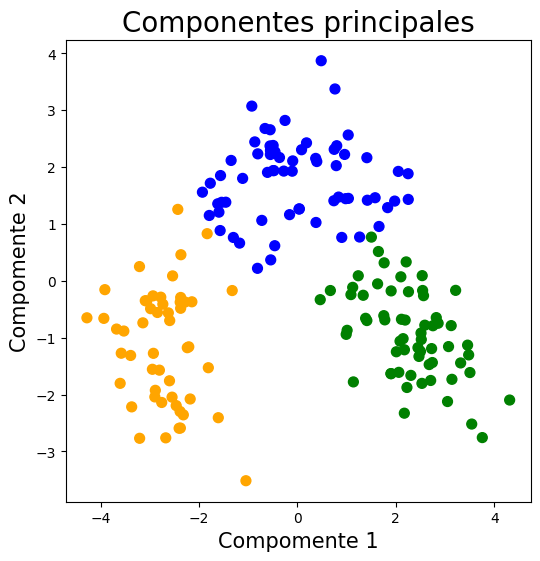

In [19]:
fig = plt.figure(figsize=(6,6))

ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Compomente 1', fontsize=15)
ax.set_ylabel('Compomente 2', fontsize=15)
ax.set_title('Componentes principales', fontsize=20)

color_theme = np.array(['blue', 'green', 'orange', 'black', 'yellow','cyan','magenta','brown','gray','pink'])
ax.scatter(x=pca_nombres_vinos.Componente_1, y = pca_nombres_vinos.Componente_2, c=color_theme[pca_nombres_vinos.KMeans_Clusters], s=50)
plt.show

# **Parte 3: Kmeans++**
Investigue qué es K-means++ y la diferencia con k-means

Kmeans++ es una modificación del algoritmo Kmeans para clustering. La principal diferencia entre Kmeans y Kmeans++ es la forma en que seleccionan los centroides de  los clusters iniciales. 

Cuando solamente se usa Kmeans, los centroides iniciales se seleccionan aleatoriamente, tomando como base la data. Por otra parte, Kmeans++ realiza un proceso un poco diferente:

* Primero coloca el primer centroide de los clusters aleatoriamente a partir de los puntos de datos.
* Luego (para cada punto de datos) calcula la distancia que existe entre este y el centroide más cercano. 
* A continuación coloca el siguiente centroide aleatoriamente pero le agrega una probabilidad proporcional al cuadrado de la distancia al centroide más cercano que encontró anteriormente.

De esta manera, al utilizar Kmeans++, existe una mayor probabilidad de encontrar clusters y centroides óptimos que no sean tan afectados por la aleatoriedad como lo eran con Kmeans.

Rerefencias:

* Arthur, D., & Vassilvitskii, S. (2007). K-means++: The advantages of careful seeding. Proceedings of the eighteenth annual ACM-SIAM symposium on Discrete algorithms, 1027-1035.
* Scikit-learn documentation on Kmeans and Kmeans++: https://scikit-learn.org/stable/modules/clustering.html#k-means

# **Parte 4: BIC AIC**

Repetir la Parte 2 pero use las métricas BIC y AIC para determinar el número de clusters. 

Calculando BIC y AIC para k =   1
Calculando BIC y AIC para k =   2
Calculando BIC y AIC para k =   3
Calculando BIC y AIC para k =   4
Calculando BIC y AIC para k =   5
Calculando BIC y AIC para k =   6
Calculando BIC y AIC para k =   7
Calculando BIC y AIC para k =   8
Calculando BIC y AIC para k =   9
Calculando BIC y AIC para k =   10
Calculando BIC y AIC para k =   11


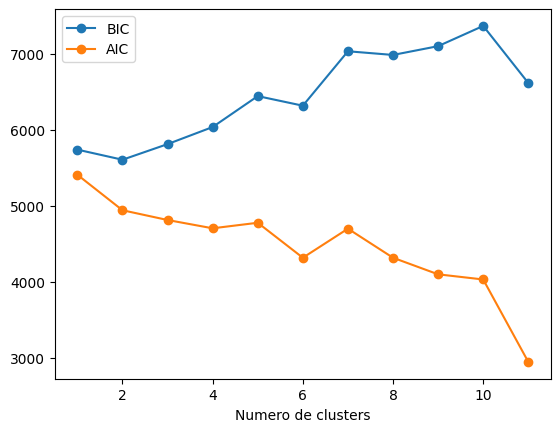

In [20]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

#Implementa k-means clustering para k clusters
k_vinos_bic_aic = [1,2,3,4,5,6,7,8,9,10,11] # número de colores
distorsion_vinos_bic = []
distorsion_vinos_aic = []
for i in k_vinos:
    # Fit KMeans models for each k value and calculate BIC and AIC
    print('Calculando BIC y AIC para k =  ', i)
    #kmeans = KMeans(n_clusters=i) #con n_clusters = 128 puede demorar unos 5 minutos en ejecutar., n_clusters es el num. de colores.
    #kmeans.fit(vinos_norm)
    #distorsion_vinos_bic.append(metrics.bic(vinos_norm, kmeans.labels_))
    #distorsion_vinos_aic.append(metrics.aic(vinos_norm, kmeans.labels_))
    gmm = GaussianMixture(n_components=i, init_params='kmeans')
    gmm.fit(vinos_norm)
    distorsion_vinos_bic.append(gmm.bic(vinos_norm))
    distorsion_vinos_aic.append(gmm.aic(vinos_norm))

# Plot the BIC and AIC scores as a function of cluster number
import matplotlib.pyplot as plt
plt.plot(k_vinos, distorsion_vinos_bic, 'o-', label='BIC')
plt.plot(k_vinos, distorsion_vinos_aic, 'o-', label='AIC')
plt.xlabel('Numero de clusters')
plt.legend()
plt.show()

# **Parte 5: Conclusiones**

Concluya su trabajo de acuerdo a sus observaciones de los experimentos realizados.

Debido a que, utilizando el criterio de BIC y AIC, el valor menor es mejor, se puede concluir que:

* Según el criterio BIC, el valor óptimo de $k$ sería $2$.
* Según el criterio AIC, el valor óptimo de $k$ sería $11$.

Referencias para el código:

* https://datascience.oneoffcoder.com/kmc-bic-aic.html